In [1]:
corr = '../out/conditions_correlations.tsv'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
# other imports
import itertools
import numpy as np
import pandas as pd

In [4]:
strains = ['S288C', 'Y55',
           'UWOP', 'YPS']
cstrains = {x: c
            for x, c in zip(strains, sns.color_palette('Set1', len(strains)))}

In [5]:
m = pd.read_table(corr)
m = m[(m['condition'] != m['condition.1'])]
m = m.set_index(['strain', 'condition', 'condition.1']).sort_index()

In [8]:
malgly = [(x, y) for z, x, y in m.index
          if (x.startswith('Maltose') and y.startswith('Glycerol'))
          or (y.startswith('Maltose') and x.startswith('Glycerol'))]
nacl = [(x, y) for z, x, y in m.index
        if x.startswith('NaCl') and y.startswith('NaCl')]
caff = [(x, y) for z, x, y in m.index
        if x.startswith('Caffeine') and y.startswith('Caffeine')]
aa = [(x, y) for z, x, y in m.index
      if x.startswith('aa ') and y.startswith('aa ')]

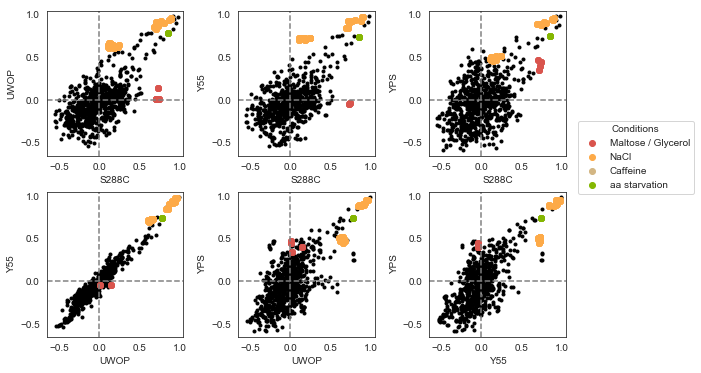

In [9]:
plt.figure(figsize=(9.3, 6))

for i, (strain1, strain2) in enumerate(itertools.combinations(
                                       sorted({x[0] for x in m.index}),
                                       2)):
    plt.subplot(2, 3, i+1)
    
    s1 = sorted([strain1, strain2])[0]
    s2 = sorted([strain1, strain2])[1]
    
    m1 = m.loc[s1]
    m2 = m.loc[s2]
    n = m1.join(m2, rsuffix='1', how='inner')
    
    plt.plot(n['correlation'],
             n['correlation1'],
             'k.',
             label='_')
    plt.plot(n.reindex(malgly).dropna()['correlation'],
             n.reindex(malgly).dropna()['correlation1'],
             'o',
             color=sns.xkcd_rgb['pale red'],
             label='Maltose / Glycerol')
    plt.plot(n.reindex(nacl).dropna()['correlation'],
             n.reindex(nacl).dropna()['correlation1'],
             'o',
             color=sns.xkcd_rgb['light orange'],
             label='NaCl')
    plt.plot(n.reindex(caff).dropna()['correlation'],
             n.reindex(caff).dropna()['correlation1'],
             'o',
             color=sns.xkcd_rgb['very light brown'],
             label='Caffeine')
    plt.plot(n.reindex(caff).dropna()['correlation'],
             n.reindex(caff).dropna()['correlation1'],
             'o',
             color=sns.xkcd_rgb['dark lime'],
             label='aa starvation')
    
    plt.xlim(-0.65, 1.05)
    plt.ylim(-0.65, 1.05)
    
    plt.xlabel(s1)
    plt.ylabel(s2)
    
    plt.axvline(0,
                color='grey',
                ls='dashed')
    plt.axhline(0,
                color='grey',
                ls='dashed')
    
    plt.xticks([-0.5, 0, 0.5, 1])
    plt.yticks([-0.5, 0, 0.5, 1])
    
    if i == 5:
        plt.legend(title='Conditions',
                   bbox_to_anchor=(1.05, 0.95),
                   loc='lower left')

plt.subplots_adjust(hspace=0.25,
                    wspace=0.4)

plt.savefig('conditions-correlations.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('conditions-correlations.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);